<a href="https://colab.research.google.com/github/berkaykarlik/whoIsThatPokemon_CNN/blob/master/ModelTestPokemonV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Login Kaggle

In [1]:
from google.colab import files
uploaded = files.upload()
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Download dataset

In [0]:
!kaggle datasets download -d lantian773030/pokemonclassification
!unzip pokemonclassification.zip

Libraries from Onur

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras import models
from keras import layers
from keras import losses
from keras import regularizers
from keras import optimizers
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from shutil import copy
from shutil import rmtree

Libraries from Ates

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tqdm import tqdm

Prepare path from Onur

In [0]:
path = 'PokemonData'
if os.path.exists('train'):
    rmtree('train')
if os.path.exists('validate'):
    rmtree('validate')
if os.path.exists('test'):
    rmtree('test')

os.mkdir('train')
os.mkdir('validate')
os.mkdir('test')

Split data from Onur

In [0]:
image_count = 0
class_count = 0
classes = []
for i in os.listdir(path):
    classes.append(i)
    class_path = os.path.join(path, i)
    if not os.path.exists(os.path.join('train', i)):
        os.mkdir(os.path.join('train', i))
    if not os.path.exists(os.path.join('validate', i)):
        os.mkdir(os.path.join('validate', i))
    if not os.path.exists(os.path.join('test', i)):
        os.mkdir(os.path.join('test', i))
    image_paths = []
    for j in os.listdir(class_path):
        image_paths.append(os.path.join(class_path, j))
        image_count += 1
    np.random.shuffle(image_paths)
    training_path = image_paths[:int(len(image_paths) * .80)]
    test_path = image_paths[int(len(image_paths) * .80):]
    valid_path = training_path[int(len(training_path) * .80):]
    training_path = training_path[:int(len(training_path) * .80)]
    for j in training_path:
        copy(j, os.path.join('train', i))
    for j in valid_path:
        copy(j, os.path.join('validate', i))
    for j in test_path:
        copy(j, os.path.join('test', i))
    class_count += 1
print(image_count)
print(class_count)

Generate batches from Onur

In [0]:
data_generator = ImageDataGenerator(rescale=1./255)
train_data = data_generator.flow_from_directory(directory='train', target_size=(224,224), classes = classes, shuffle = True)

validate_data_generator = ImageDataGenerator()
validate_data = data_generator.flow_from_directory(directory='validate', target_size=(224,224), classes = classes, shuffle = True)

test_data_generator = ImageDataGenerator()
test_data = data_generator.flow_from_directory(directory='test', target_size=(224,224), classes = classes, shuffle = True)

Get Images from Ates

In [0]:
path='/content/PokemonData'

classes = []
data = []
SIZE = 100


def get_data():
  cnt = 0
  class_no = 0
  for dir in tqdm(os.listdir(path)):
    classes.append(dir)
    dir_path = os.path.join(path,dir)
    for img in tqdm(os.listdir(dir_path)):
      try:
        img_array = cv2.imread(os.path.join(dir_path,img))
        resized_array = cv2.resize(img_array,(SIZE,SIZE))
        data.append([resized_array,class_no])
      except:
        pass
    class_no += 1
get_data()

Seperate Features and Labels from Ates

In [0]:
x = []
y = []
for features,label in data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, SIZE, SIZE, 3)
y = np.array(y)

Split Data from Ates

In [6]:
test_images = []
test_labels = []
train_images = []
train_labels = []


testCnt = 0
for i in range(1,len(y)):
    if y[i] == y[i-1]:
        if testCnt < 5:
            test_images.append(x[i-1])
            test_labels.append(y[i-1])
        else:
            train_images.append(x[i-1])
            train_labels.append(y[i-1])
        testCnt = testCnt + 1
    else:
        testCnt = 0
    
test_images = np.array(test_images).reshape(-1, SIZE, SIZE, 3)
train_images = np.array(train_images).reshape(-1, SIZE, SIZE, 3)
test_labels = np.array(test_labels)
train_labels = np.array(train_labels)


print(train_images.shape,test_images.shape)

(5925, 100, 100, 3) (750, 100, 100, 3)


TF libraries from Ates

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Model Settings from Ates

In [0]:
train_images, test_images = train_images / 255.0, test_images / 255.0
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

Model from Ates

In [18]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(SIZE, SIZE ,3)),
    Conv2D(64, 3, padding='same', activation='relu',input_shape=(SIZE, SIZE ,3)),
    MaxPooling2D(pool_size=(5, 5),strides=(3, 3), padding='valid'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(5, 5),strides=(3, 3), padding='valid'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(150,activity_regularizer=tf.keras.regularizers.l2(0.01))
])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

Model from Onur

In [9]:
model = Sequential([
                                 Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape = (SIZE, SIZE, 3)),
                                 Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
                                 MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
                                 Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
                                 Conv2D(64, kernel_size=(5,5), activation='relu', padding='same'),
                                 MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
                                 Conv2D(128, kernel_size=(7,7), activation='relu', padding='same'),
                                 Conv2D(128, kernel_size=(7,7), activation='relu', padding='same'),
                                 MaxPooling2D(pool_size=(4,4), strides=2, padding='valid'),
                                 Flatten(),
                                 Dense(512, activation='relu'),
                                 Dropout(0.4),
                                 Dense(150)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       4

Compile and Fit

In [10]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'] )
x_train, x_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.33, shuffle= True)
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_valid, y_valid), callbacks=[callback], shuffle=True)

Epoch 1/150
125/125 [==============================] - 12s 94ms/step - loss: 6.0171 - accuracy: 0.0088 - val_loss: 4.9190 - val_accuracy: 0.0174
Epoch 2/150
125/125 [==============================] - 11s 89ms/step - loss: 4.7823 - accuracy: 0.0227 - val_loss: 4.6121 - val_accuracy: 0.0373
Epoch 3/150
125/125 [==============================] - 11s 90ms/step - loss: 4.2578 - accuracy: 0.0723 - val_loss: 6.0310 - val_accuracy: 0.0373
Epoch 4/150
125/125 [==============================] - 11s 90ms/step - loss: 3.6596 - accuracy: 0.1620 - val_loss: 4.9674 - val_accuracy: 0.0772
Epoch 5/150
125/125 [==============================] - 11s 90ms/step - loss: 3.0581 - accuracy: 0.2688 - val_loss: 6.4591 - val_accuracy: 0.0905
Epoch 6/150
125/125 [==============================] - 11s 91ms/step - loss: 2.4965 - accuracy: 0.3893 - val_loss: 2.8709 - val_accuracy: 0.3655
Epoch 7/150
125/125 [==============================] - 11s 91ms/step - loss: 1.9944 - accuracy: 0.4969 - val_loss: 4.7797 - val_ac

Evaluation on Test Set

In [12]:
loss, accuracy = model.evaluate(test_images, test_labels)

print("Test Loss:%.4f, Accuracy: %.4f" %(loss,accuracy))

24/24 [==============================] - 1s 37ms/step - loss: 6.0980 - accuracy: 0.4400
Test Loss:6.0980, Accuracy: 0.4400


Plot for Statistics

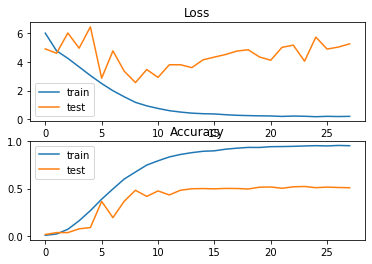

In [13]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()